Description of the Dataset


 This dataset contains information about movies and their audience ratings. The features included are:
 - movie_title: Title of the movie (not used as a feature in the model)
 - duration: The runtime of the movie in minutes (numeric feature)
 - genre: The genre of the movie, such as Action, Comedy, or Drama (categorical feature)
 - director_likes: A measure of the director's popularity, represented by the number of likes (numeric feature)
 - critic_score: A score given by critics to the movie (numeric feature)
 - audience_rating: The target variable representing the rating given by the audience (continuous numeric featur)

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# Load the dataset

In [2]:
movies_data=pd.read_excel("Rotten_Tomatoes_Movies3.xls")
movies_data.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


# Explore the dataset

In [5]:
print("\n Dataset Overview:\n")
movies_data.info()


 Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638

In [7]:
print("\nSummery Statistics:\n")
movies_data.describe(include="all")


Summery Statistics:



,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
count,16638,16614,8309,16638,16621,16524,15289,16354,15823,16636,16483.000000,16222,16638,16638.000000,16638.000000,16386.000000
unique,16106,16613,8307,8,1080,8314,12121,16326,NaN,NaN,NaN,2886,3,NaN,NaN,NaN
top,Home,An adaptation of the Broadway drama about Prin...,"Extinction has a few intriguing ideas, but the...",R,Drama,Alfred Hitchcock,Woody Allen,Chris Rock,NaN,NaN,NaN,Paramount Pictures,Rotten,NaN,NaN,NaN
freq,5,2,2,6136,1727,36,33,4,NaN,NaN,NaN,497,7233,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-10-24 22:10:52.973519488,2008-08-13 13:35:49.266650624,102.391494,NaN,NaN,60.466522,56.607104,60.470829
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1914-06-01 00:00:00,1935-06-06 00:00:00,1.000000,NaN,NaN,0.000000,5.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993-03-29 00:00:00,2003-01-28 00:00:00,90.000000,NaN,NaN,38.000000,12.000000,45.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-08-04 00:00:00,2008-04-08 00:00:00,99.000000,NaN,NaN,66.000000,28.000000,62.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-06-28 00:00:00,2014-05-12 00:00:00,111.000000,NaN,NaN,86.000000,76.000000,77.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-07 00:00:00,2019-11-01 00:00:00,2000.000000,NaN,NaN,100.000000,497.000000,100.000000


# Handle missing values

In [10]:
missing_values=movies_data.isnull().sum()
print("\nMissing Values:\n")
print(missing_values[missing_values>0])


Missing Values:

movie_info              24
critics_consensus     8329
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
audience_rating        252
dtype: int64


# Fill or drop missing values (example strategies)


In [12]:
movies_data.fillna(movies_data.mean(numeric_only=True),inplace=True)
movies_data.dropna(axis=1,inplace=True)

# Encoad categorical variables

In [15]:
label_encoders = {}
for column in movies_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    movies_data[column] = le.fit_transform(movies_data[column].astype(str))
    label_encoders[column] = le

# Correlation Matrix

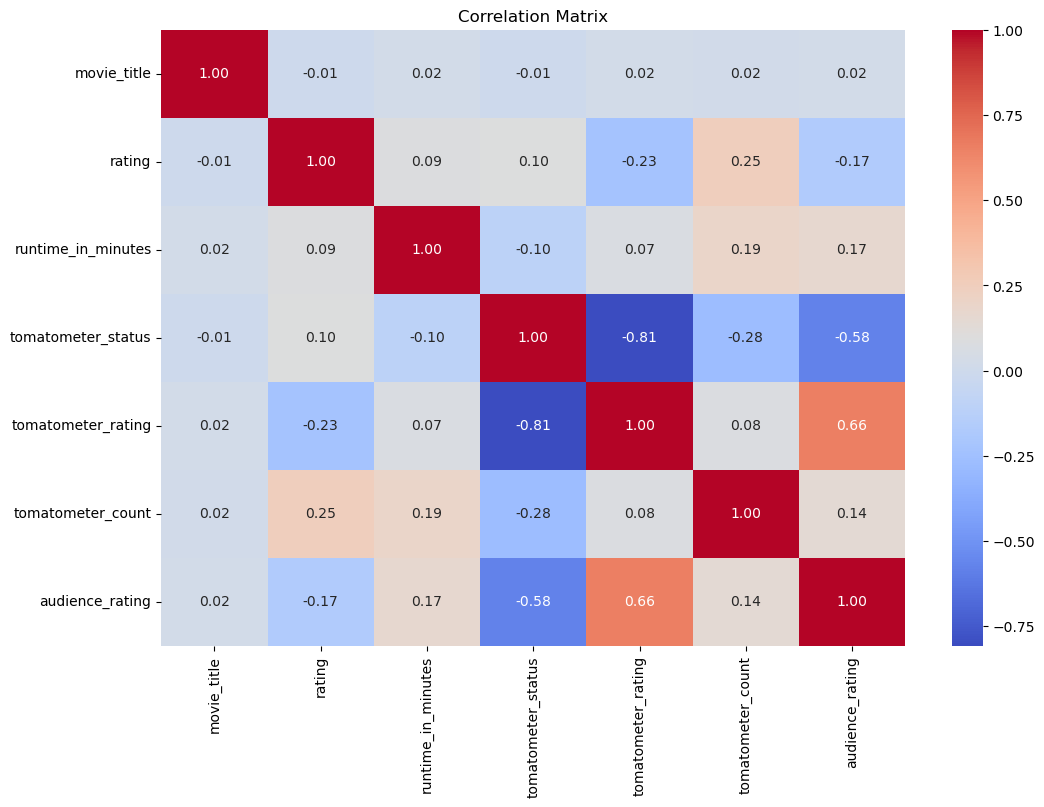

In [17]:
def plot_correlation_matrix(df):
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

plot_correlation_matrix(movies_data)

# Distribution of Audience Rating

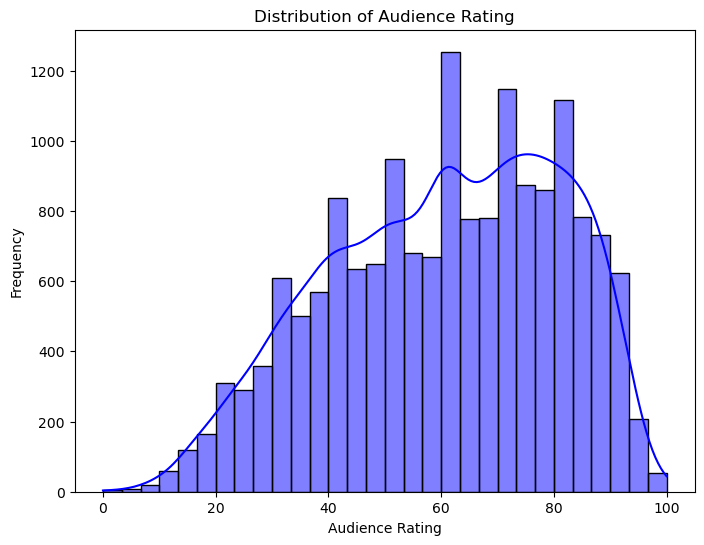

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(movies_data['audience_rating'], kde=True, bins=30, color='blue')
plt.title('Distribution of Audience Rating')
plt.xlabel('Audience Rating')
plt.ylabel('Frequency')
plt.show()


# Pairplot of selected features

C:\Users\MANI\.anaconda\murugan\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


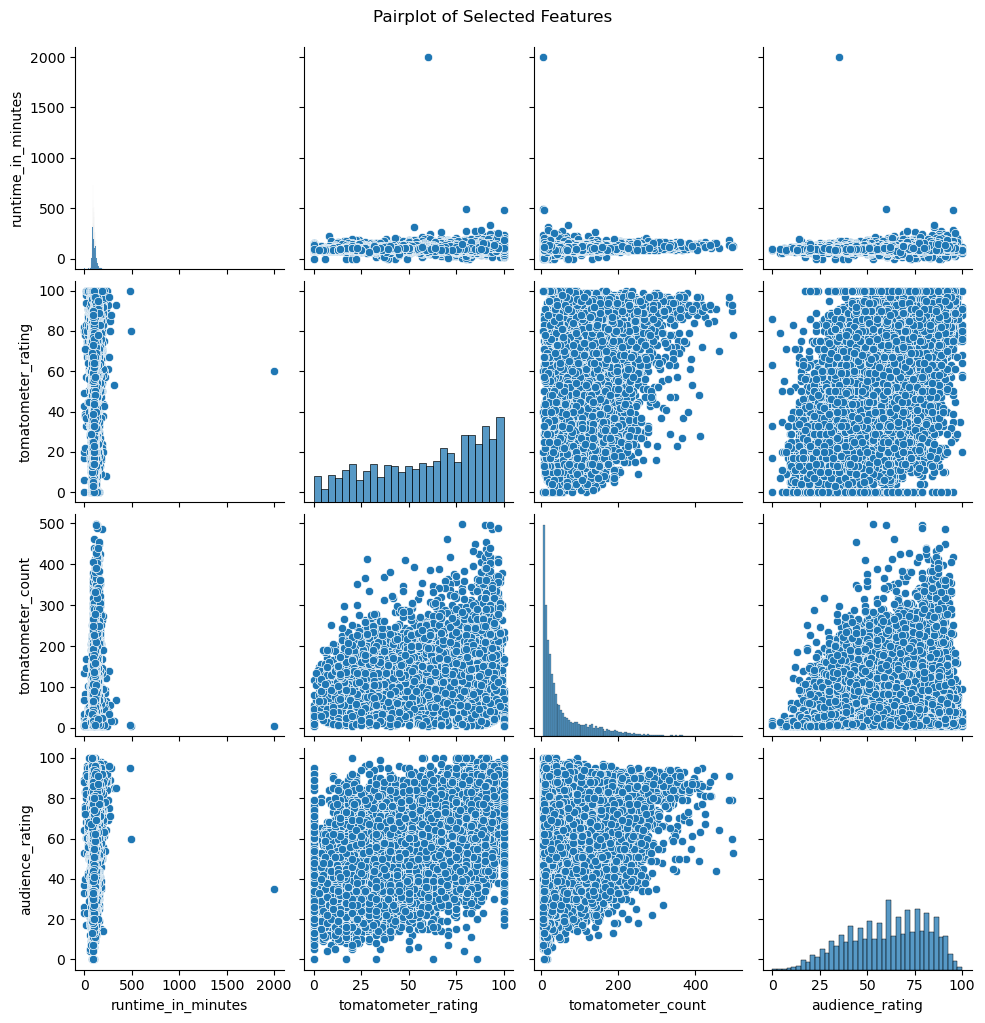

In [21]:
selected_features = movies_data.select_dtypes(include=['float64', 'int64']).columns[:5]
sns.pairplot(movies_data[selected_features])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# Boxplot for numerical features

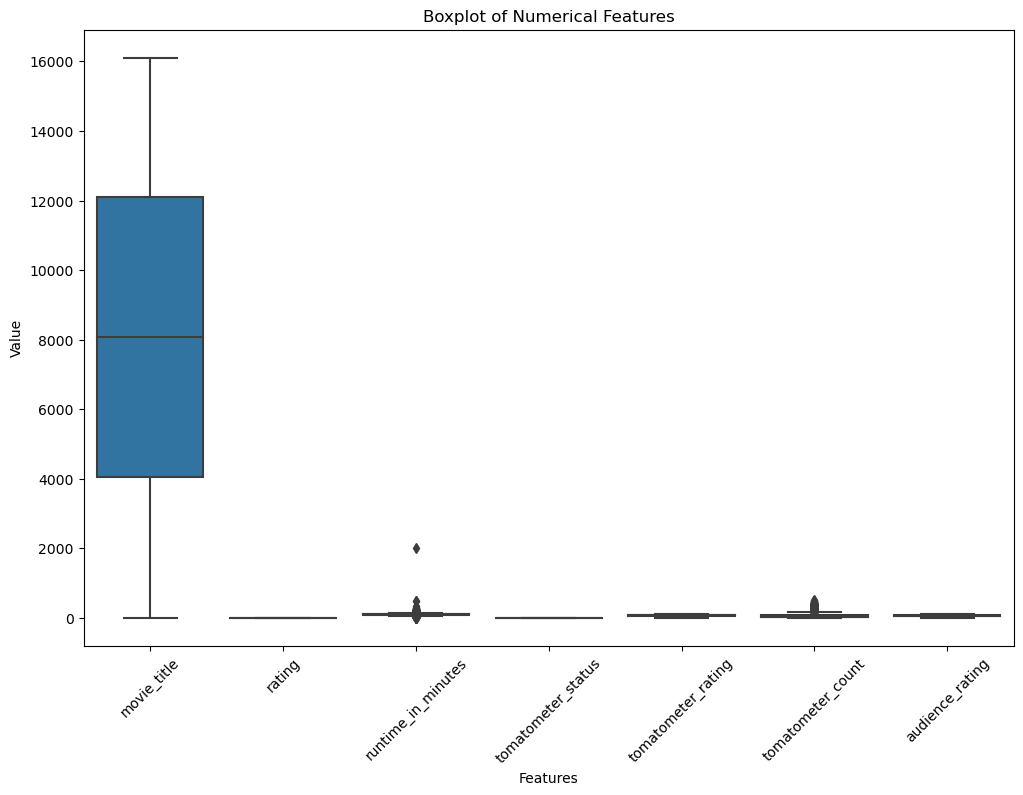

In [31]:
data_melted = movies_data.melt(var_name="Features", value_name="Value")

plt.figure(figsize=(12, 8))
sns.boxplot(x="Features", y="Value", data=data_melted)  # Fix: Use `data` instead of `movies_data`
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

# Split data into features and target

In [32]:
X = movies_data.drop(columns=['audience_rating'])
y = movies_data['audience_rating']


# Standardize numerical features

In [33]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test-Split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model selection

In [35]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Model evaluation

In [37]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f'Model Evaluation: {model.__class__.__name__}')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'Mean Absolute Error: {mae:.2f}')
    print(f'R^2 Score: {r2:.2f}')
    print("\n")
    
    return {
        'mse': mse,
        'mae': mae,
        'r2': r2
    }

# Train and evaluate models

In [38]:
evaluation_results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    evaluation_results[model_name] = evaluate_model(model, X_test, y_test)

Training Linear Regression...
Model Evaluation: LinearRegression
Mean Squared Error: 224.39
Mean Absolute Error: 12.03
R^2 Score: 0.45


Training Random Forest...
Model Evaluation: RandomForestRegressor
Mean Squared Error: 232.38
Mean Absolute Error: 12.11
R^2 Score: 0.43




# Plot feature importance for Random Forest

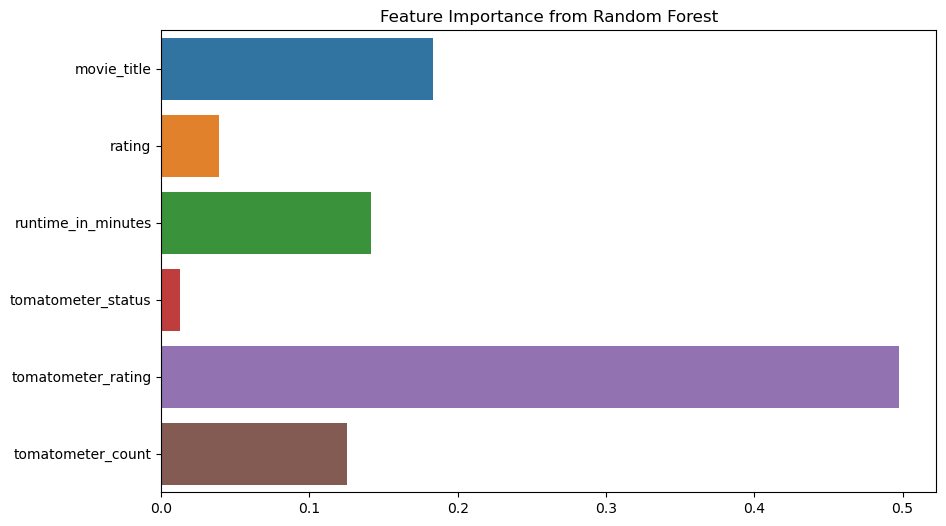

In [39]:
if 'Random Forest' in models:
    rf_model = models['Random Forest']
    feature_importances = rf_model.feature_importances_
    feature_names = movies_data.drop(columns=['audience_rating']).columns
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances, y=feature_names)
    plt.title('Feature Importance from Random Forest')
    plt.show()
